In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
import math

In [2]:
calories = pd.read_csv('Dataset/calories.csv')
exercise = pd.read_csv('Dataset/exercise.csv')

In [3]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [4]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [5]:
data = pd.concat([exercise,calories.Calories],axis=1)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


/var/folders/4k/n52wtb5j0mx3pc8g_ghd4lw40000gn/T/ipykernel_10947/1429273199.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Height)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


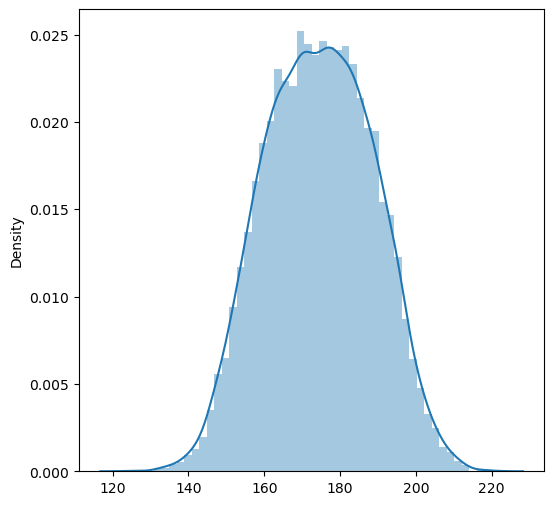

In [6]:
plt.figure(figsize=(6,6))
sns.distplot(x=data.Height)
plt.show()

/var/folders/4k/n52wtb5j0mx3pc8g_ghd4lw40000gn/T/ipykernel_10947/3143888955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Weight)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


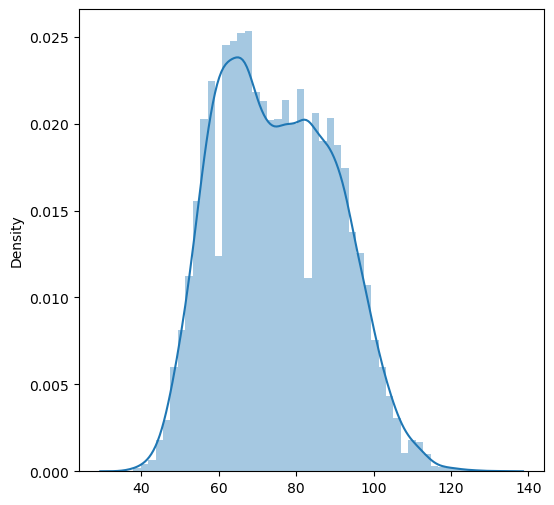

In [7]:
plt.figure(figsize=(6,6))
sns.distplot(x=data.Weight)
plt.show()

/var/folders/4k/n52wtb5j0mx3pc8g_ghd4lw40000gn/T/ipykernel_10947/249507179.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Age)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


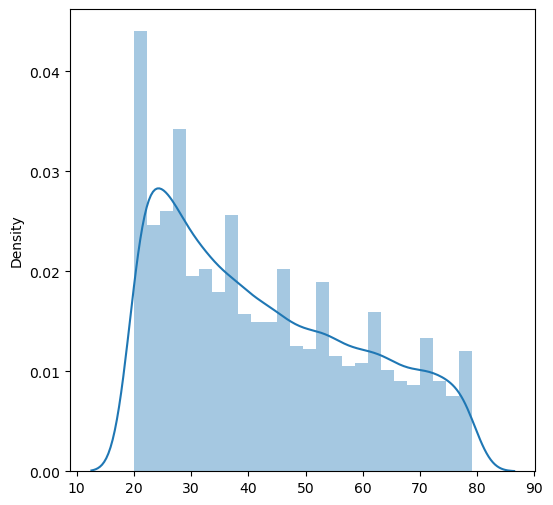

In [8]:
plt.figure(figsize=(6,6))
sns.distplot(x=data.Age)
plt.show()

In [9]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Gender = le.fit_transform(data.Gender)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [11]:
data.corr()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,-0.000687,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,-0.001827,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


In [12]:
data = data.drop(['User_ID', 'Gender'], axis = 1)

In [13]:
data

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...
14995,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,78,193.0,97.0,2.0,84.0,38.3,11.0


In [14]:
X = data.drop(['Calories'],axis=1)
Y = data['Calories']
X = X.to_numpy()
Y = Y.to_numpy()

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((12000, 6), (3000, 6))

In [16]:
##Using sklearn linear regression model

In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
score = metrics.r2_score(y_test,pred)
score

0.967286008512458

In [18]:
##Using my model

In [19]:
x_new = np.ones(shape = (X_train.shape[0],X_train.shape[1]+1))
x_new[:,1:] = X_train

x_new

array([[  1. ,  37. , 179. , ...,   7. ,  81. ,  39.5],
       [  1. ,  23. , 195. , ...,  26. , 110. ,  40.5],
       [  1. ,  33. , 181. , ...,  12. ,  88. ,  40.1],
       ...,
       [  1. ,  57. , 189. , ...,   8. ,  90. ,  39.5],
       [  1. ,  35. , 174. , ...,  12. ,  97. ,  40.2],
       [  1. ,  26. , 182. , ...,  16. ,  91. ,  40.5]])

In [29]:
def compute_grad(x, y, params):
    m = x.shape[0]
    predictions = np.dot(x, params)
    errors = predictions - y
    gradient = (1/m) * np.dot(x.T, errors)
    # Clip the gradient
    gradient = np.clip(gradient, -1, 1)
    return gradient

In [28]:
def compute_cost(x, y, params):
    m = x.shape[0]
    cost = (1/(2*m)) * (np.sum((np.dot(x, params) - y) ** 2))
    return cost

In [22]:
def grad_desc(x, y, params, iters, lrate):
    
    J_history = []
    slope = np.zeros(params.shape) 
    for i in range(iters):
        slope = compute_grad(x, y, params)
        params = params - (lrate*slope)
       
        if i < 100000:
            J_history.append(compute_cost(x, y, params))
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % 1000 == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    
    
    return params
        

In [23]:
def predict(x, params):
    x_new = np.ones(shape = (x.shape[0],x.shape[1]+1))
    x_new[:,1:] = x
    pred = np.dot(x_new, params)
    return pred

In [51]:
def r2(y, pred):
    score = metrics.r2_score(y,pred)
    return score

In [53]:
params = np.zeros(x_new.shape[1])
lrate = 0.001

params = grad_desc(x_new, y_train, params, 10000, lrate)
pred = predict(X_test, params)
score = r2(y_test, pred)
score

Iteration    0: Cost  5861.18   
Iteration 1000: Cost   996.87   
Iteration 2000: Cost   436.50   
Iteration 3000: Cost   182.65   
Iteration 4000: Cost   127.66   
Iteration 5000: Cost   106.59   
Iteration 6000: Cost   106.57   
Iteration 7000: Cost   106.56   
Iteration 8000: Cost   106.55   
Iteration 9000: Cost   106.55   


0.94598103568347

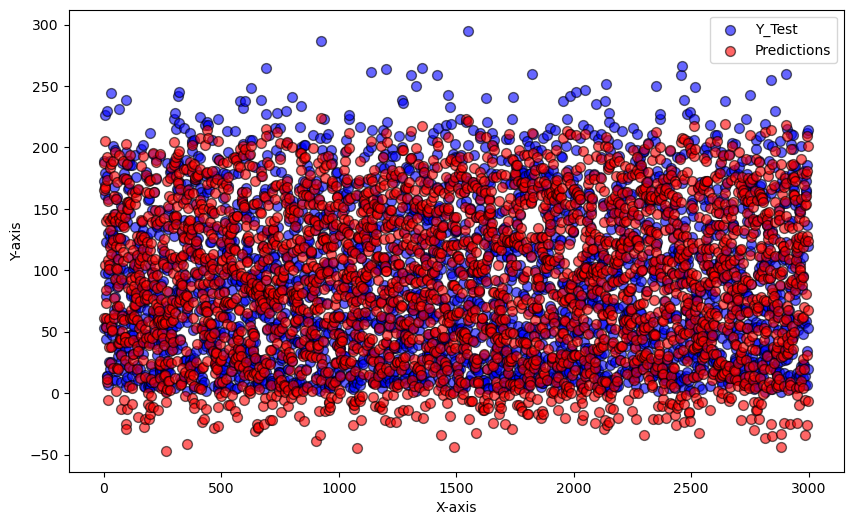

In [49]:
plt.figure(figsize=(10, 6))
x_indices = np.arange(X_test.shape[0])

plt.scatter(x_indices, y_test, label='Y_Test', color='blue',alpha=0.6, edgecolor='black', s=50)

# Plot the second array
plt.scatter(x_indices, pred, label='Predictions', color='red',alpha=0.6, edgecolor='black', s=50)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.legend()
# Display the plot
plt.show()
